<a href="https://colab.research.google.com/github/Ignaciacb/Tareas-Algoritmos-y-estructuras-de-datos/blob/main/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2025 Tarea 1 [Ignacia Cejas Barra]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Nelson Baloian •
Sección 3 Patricio Poblete




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, **la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.**

Para simular este proceso, **supondremos que cada celda almacena un número entero**, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, **hasta que no quede ninguno que tenga 4 o más granos de arena**. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene **todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena** (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. **Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes** (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. **El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos.** Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

#función que recibe el valor de N y en base a eso genera las dimensiones correspondientes para la matriz sea capza de contener todos los granos de arena sin que ninguno se salga de los bordes
def tamano(N):
    A = int(math.sqrt(N))      #definimos A como el valor entero más pequeño que la raiz de N. A corresponderá al posible número de filas y columnas que tendrá la matriz
    if A%2 == 0:               #si A es par
      return A + 1             #convierte A en impar, para que así la matriz tenga un centro
    else:                      #si A es impar
      return A                 #conservamos A impar

#función que crea una matriz b llena de ceros de nxn
def MATRIZ(N):
  n = tamano(N)          #número de filas y columnas que tendrá la matriz
  b = np.zeros((n,n))    #matriz de ceros de nxn
  return b

#función que recibe un valor x y una matriz a, y dice si hay un valor mayor o igual a x en la matriz
def existe(x,b):
  n,n = np.shape(b)        #devuelve el tamaño de la matriz b
  for i in range(n):       #recorre filas y columnas
    for j in range(n):
      if b[i,j] >= x:      #si el valor de una celda de la matriz es mayor o igual a 4
        return True
  return False

#función que integra todas las otras funciones echas antes, para que dentro de la matriz creada y desde la celda central se empiecen a distribuir los granos de arena.
def arena(N):
  NumeroDeCiclos = 0     #partimos en el ciclo 0
  n = tamano(N)          #tamaño que tendrá la matriz
  b = np.zeros((n,n))    #inicialmente, la matriz será sólo de ceros
  (i,j) = (n//2,n//2)    #corresponde al valor cetral de la matriz
  b[i][j] = N            #el valor que tendrá la celda central de la matriz será N (parámetro de la función)


  while existe(4,b):
    for k in range(n):        #en cada fila de la matriz, considerando que la matriz es de nxn
      for h in range(n):      #en cada columna

          if b[k][h] >= 4:                    #si el elemento es mayor a 4
            b[k][h] = b[k][h] - 4             #se le restan 4 al número de la posición actual
            b[k+1][h] = b[k+1][h] + 1         #se agrega uno a la celda de arriba
            b[k-1][h] = b[k-1][h] + 1         #se agrega uno a la celda de abajo
            b[k][h+1] = b[k][h+1] + 1         #se agrega uno a la celda de la derecha
            b[k][h-1] = b[k][h-1] + 1         #se agrega uno a la celda de la izquierda


            NumeroDeCiclos = NumeroDeCiclos + 1     #aumentamos en 1 el número de ciclos
  print("Número de ciclos:" + str(NumeroDeCiclos))

  #Dibuja
  plt.matshow(b)
  plt.show()

Explique aquí cómo calculó el tamaño que necesita tener el tablero.

Para calcular el tamaño del tablero, en un principio lo único que sabía es que debía ser una matriz cuadrada, y en lo posible que su número de filas y columnas fuera impar (para que así, existiera un valor central).
Luego lo que hice fue buscar un patrón, a mano, que se cumpliera de acuerdo al valor de N, note que se cumplía un patrón que cambiaba de acuerdo a las potencias de N, es decir, para N ∈ {4, 15} el tablero necesario debía ser de 3x3, luego para N ∈ {16, 63} el tablero debía ser de 5x5 y luego para N > 64, el tablero debía tener dimensiones de 7x7.

Gracias a esto, noté que las potencias de 4 marcaban el tamaño de la matriz del problema, pues √4 = 2 y desde el N = 4 la grilla debe ser de tamaño 3x3, ie, √4 + 1, luego √16 = 4 y desde N = 16 el tablero debía tener dimensiones de 5x5, ie, √16 + 1.

Al llevar a cabo los cálculos anteriores y además haciendo el dibujo a mano de como quedarían las celdas con diferentes valores de N, noté que la cantidad de filas y columnas que tendría la matriz dependerá de la parte entera de la raíz cuadrada del valor de N, pues vimos la coincidencia entre los valores de las raíces de N y las respectivas dimensiones necesarias para el tablero. Una vez llegada a esa conclusión me enfrenté al problema de las matricez con filas y columnas pares, lo cual para la conveniencia del problema no debería ocurrir, ante el problema decidí sumar 1 en caso de que la matriz fuera de dimensiones pares, pues esto era mejor que restar 1 y arriesgarme a que las dimensiones de la matriz fueran muy pequeñas y los granos de arena salieran del tablero.
Con esta fórmula, el tablero generado será más grande que el tablero de tamaño justo, sin embargo esto es preferible a que el tablero fuese muy pequeño y no cumpliera con las dimensiones de distribución del arena.

A grandes rasgos, esta fue la lógica que me llevó a hacer la función tamano(N).

Ahora ejecute la función para $N=128$:

Número de ciclos:342


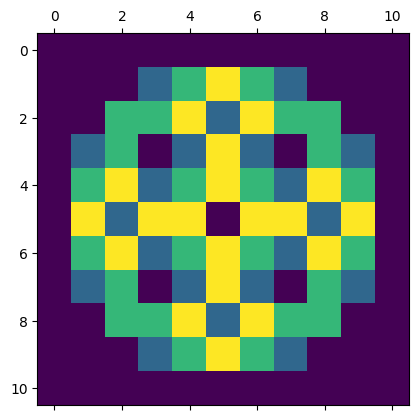

In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

Número de ciclos:45202532


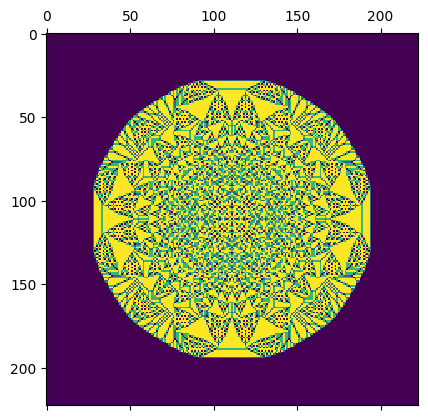

In [ ]:
arena(50000) # reemplace N por el valor máximo que alcanzó a procesar

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que **si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos** de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

#función que recibe el valor de N y en base a eso genera las dimensiones correspondientes para la matriz
def tamano(N):
    A = math.floor(math.sqrt(N))   #definimos A como el valor entero más pequeño que la raiz de N. A corresponderá al número de filas y columnas que tendrá la matriz
    if A%2 == 0:                   #si A es par
      return A + 1                 #convierte A en impar, para que así la matriz tenga un centro
    else:                          #si A es impar
      return A                     #conservamos A impar

#función que crea una matriz c llena de ceros de nxn
def MATRIZ(N):
  n = tamano(N)          #número de filas y columnas que tendrá la matriz
  c = np.zeros((n,n))    #matriz de ceros de nxn
  return c

# función que recibe un valor x y una matriz a, y dice si hay un valor mayor o igual a x en la matriz
def existe(x,c):
  n,n = np.shape(c)        #devuelve el tamaño de la matriz b
  for i in range(n):       #recorre filas y columnas
    for j in range(n):
      if c[i,j] >= x:      #si el valor de una celda de la matriz es mayor o igual a 4
        return True
  return False

 #mantenemos todas las funciones auxiliares llevadas a cabo para la parte 01
 #función que, usando las funciones auxiliares, genera que si en una celda hay un número de granos de arena mayor o igual a 4,
 #le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos

def arena2(N):
  NumeroDeCiclos = 0     #partimos en el ciclo 0
  n = tamano(N)
  c = np.zeros((n,n))
  (i,j) = (n//2,n//2)    #corresponde al valor cetral de la matriz
  c[i][j] = N            #el valor que tendrá la celda central de la matriz será N (parámetro de la función)


  while existe(4,c):
    for k in range(n):        #en cada fila de la matriz, considerando que la matriz es de nxn
      for h in range(n):      #en cada columna

          if c[k][h] >= 4:                    #si el elemento es mayor a 4
            g = (c[k][h]//4)                  #se define una variable g como la división entera en 4 del valor de la casilla, definí la variable, pues si no, modificaba c[k][h] en cada ciclo.
            c[k][h] = c[k][h] - (g*4)         #se le restan de una vez el mayor múltiplo de 4 posible
            c[k+1][h] = c[k+1][h] + g         #se reparten equitativamente a la celda de arriba
            c[k-1][h] = c[k-1][h] + g         #se reparten equitativamente a la celda de abajo
            c[k][h+1] = c[k][h+1] + g         #se reparten equitativamente a la celda de la derecha
            c[k][h-1] = c[k][h-1] + g         #se reparten equitativamente a la celda de la izquierda

            NumeroDeCiclos = NumeroDeCiclos + 1     #aumentamos en 1 el número de ciclos
  print("Número de ciclos:" + str(NumeroDeCiclos))  #entrega el mensaje indicando el número de ciclos que lleva la función

  #Dibuja
  plt.matshow(c)
  plt.show()


Ahora ejecute la función para $N=128$:

Número de ciclos:227


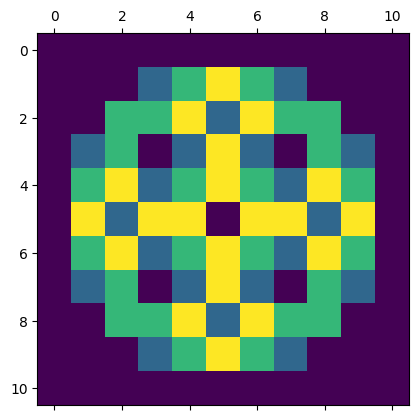

In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

Número de ciclos:1196817


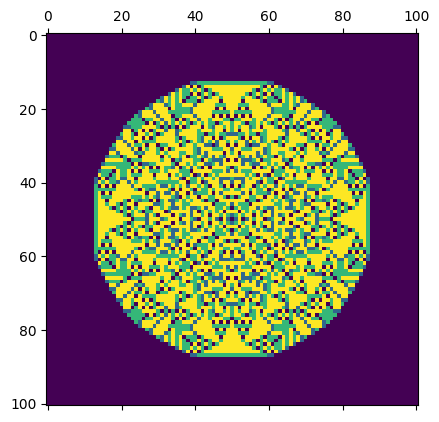

In [ ]:
arena2(10000) # reemplace N por el valor máximo que alcanzó a procesar

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

Número de ciclos realizados por cada una de las funciones para distintos valores de N.

| N | arena(N) | arena2(N)|
| - | - | - |
|4 | 1 | 1
|16 | 9 | 6
|128 | 342 | 227
|1000 | 18.226 | 11.724
|5000 | 466.188 | 307.656
|10000 | 1.830.917 | 1.196.817


Tiempo de ejecución (en segundos) de cada una de las funciones para distintos valores de N.

| N | arena(N) | arena2(N)|
| - | - | - |
|4 | 0 | 0
|16 | 0 | 0
|128 | 0 | 0
|1000 | 0 | 0
|5000 | 9 | 2
|10000 | 38 | 10


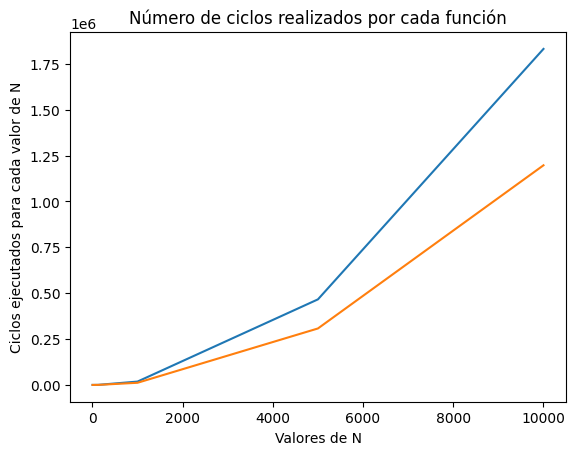

In [ ]:
x = [4,16,128,1000,5000,10000]
y = [1,9,342,18226,466188,1830917]
z = [1,6,227,11724,307656,1196817]

plt.xlabel("Valores de N")
plt.ylabel("Ciclos ejecutados para cada valor de N")
plt.title("Número de ciclos realizados por cada función")

plt.plot(x,y)
plt.plot(x,z)
plt.show()

Como podemos ver en la tabla, la optimización realizada con la función arena2(N) claramente valió la pena, pues esta no sólo disminuyó el tiempo destinado a ejecutar la función, si no, que también disminuyó de gran manera el número de ciclos. Con esto, podemos asumir que también se disminuyó la cantidad de memoria utilizada para llevar a cabo el programa, lo cual de cualquier manera resulta conveniente, pues hace que el programa trabaje de manera más eficiente.

Otra posible optimización que se podría implementar al programa, sería que si en una celda hay un número mayor a 4, quitarle de una sóla vez la mayor potencia de 4, siguiendo la misma lógica que ocupamos en la parte 2. Esta implementación claramente optimizaría el programa, pues lo más posible es que este programa genere una menor cantidad de ciclos que los dos llevados a cabo.

# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow()
plt.show()

# ESTA HECHO ARRIBA, AL FINAL DE CADA UNA DE LAS FUNCIONES

TypeError: matshow() missing 1 required positional argument: 'A'

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.